## Import thư viện


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Chuẩn bị dữ liệu

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive")

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('fashion-mnist_train.csv')
df2 = pd.read_csv('fashion-mnist_test.csv')
df_train=df1.copy()
df_test=df2.copy()
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train=df_train.label
y_test=df_test.label

X_train=df_train.drop('label',axis=1)
X_test=df_test.drop('label',axis=1)

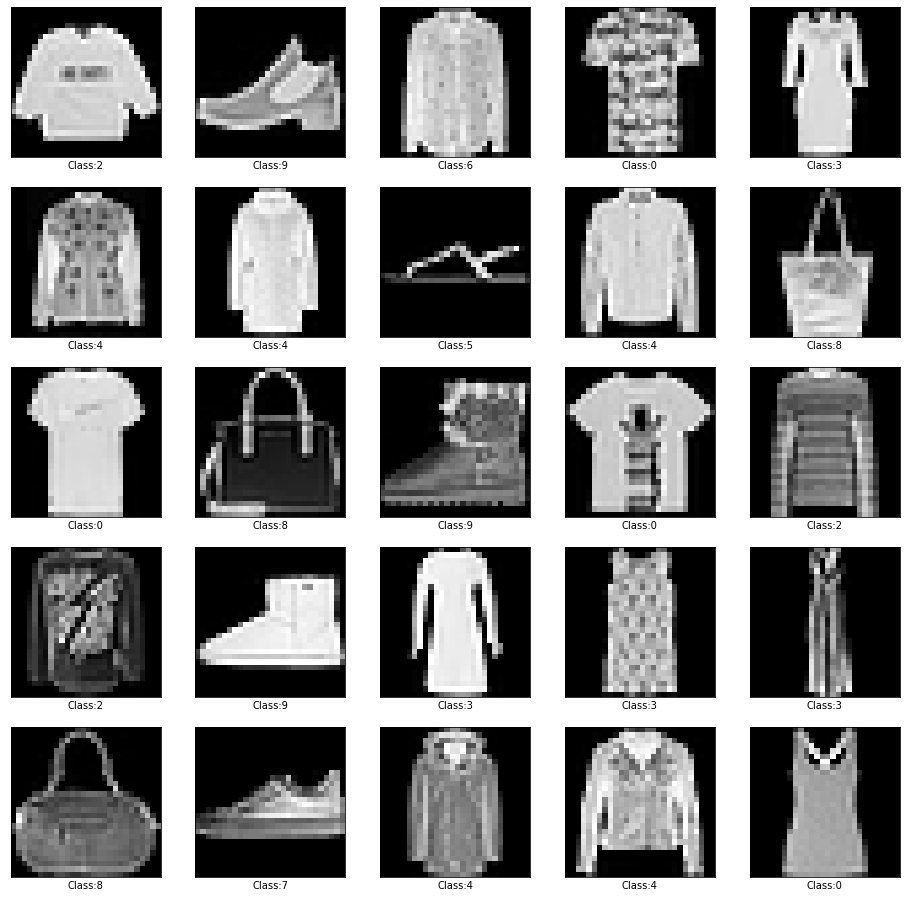

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(16,16))

for i in range(25):
    
    img = np.asarray(X_train.iloc[i])
    img = img.reshape((28,28))
    plt.subplot(5,5,(i%25)+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap='gray')
    plt.xlabel(
        "Class:"+str(df1['label'].iloc[i])
    )
plt.show()

In [ ]:
print('X_train shape:', X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape: (60000, 784)
y_train shape:  (60000,)
X_test shape:  (10000, 784)
y_test shape:  (10000,)


In [ ]:
X_train = X_train.values.reshape(-1,28,28)
X_test = X_test.values.reshape(-1,28,28)
X_train=np.array(X_train)
X_test=np.array(X_test)
X_train=X_train/255.0
X_test=X_test/255.0
print('X_train shape:', X_train.shape)
print('y_train shape: ',y_train.shape)
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

X_train shape: (60000, 28, 28)
y_train shape:  (60000,)
X_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


In [ ]:
train_images, val_images, train_labels, val_labels=train_test_split(X_train, y_train, test_size=0.2, random_state=13)
train_images=train_images.reshape(train_images.shape[0], 28, 28, 1)
X_test=X_test.reshape(X_test.shape[0], 28, 28, 1)
val_images=val_images.reshape(val_images.shape[0], 28, 28, 1)


## Xây dựng mô hình Convolutional Neural Network


In [ ]:
model=keras.Sequential([
                        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=1, padding="same", data_format="channels_last", input_shape=(28,28,1)),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", strides=1, padding="same", data_format="channels_last"),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.25),
                        tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu", strides=1, padding="same", data_format="channels_last"),
                        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
                        tf.keras.layers.Dropout(0.25),
                        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.25),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dense(512, activation='relu'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(128, activation='relu'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.3),
                        tf.keras.layers.Dense(10)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=["accuracy"])

In [ ]:
nums_classes=X_test.shape[1]
#reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)
batch_size = 128
epochs = 500

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range = 8,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True)  # randomly flip images

datagen.fit(train_images)

## Huấn luyện mô hình

In [ ]:
history = model.fit_generator(datagen.flow(train_images, train_labels, batch_size = batch_size), epochs = epochs, 
                              validation_data = (val_images, val_labels),
                              steps_per_epoch=train_images.shape[0] // batch_size #,#
                              #callbacks = [reduce_lr]# 
                              )

351/375 [===========================>..] - ETA: 1s - loss: 0.0987 - accuracy: 0.9627

## Test


In [ ]:
test_loss, test_acc=model.evaluate(X_test, y_test, verbose=2)

In [ ]:
predictions = model.predict(X_test)
predictions[0]

In [ ]:
print(np.argmax(predictions[0]))

print(y_test[0])